<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/SP/Lab4_Prism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab4 - Spectrometer. Prism measurements

v.0.1.2

$$
n(\theta) = 2 \sin\left(30^\circ + \frac{\theta}{2}\right)
\tag{1}
$$

$$
n(\lambda) = B  + \frac{C}{\lambda^2}
\tag{2}
$$



Fitting aproach:
1. For known helium and mercury measurements $(\lambda, \theta)$ calculate $n(\theta)$  with eq(1).
2. Suggest that $x = \frac{1}{\lambda^2}$ and $ y = n$ and fit eq(2) to find $B$ and $C$ constants with their errors.
3. Measure angles $\theta$ for hydrogen. Calculate $n(\theta)$ with eq(1).
4. Find wavelengths of hydrogen  for fitted $B,C$ constants with eq(3):
$$
\frac{1}{\lambda^2} = \frac{n - B}{C}
\tag{3}
$$
5. Esitmate errors for $\lambda$ as propagated errors from fit parameters $B$ and $C$.


In [1]:
# ! pip install uncertainties

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from uncertainties import ufloat, unumpy

B = 1.59305+/-0.00024, C = (9.14+/-0.06)e+03 1/nm2
Hydrogen wavelength: 433.5+/-1.9
Hydrogen wavelength: 487.8+/-2.3
Hydrogen wavelength: 655+/-4


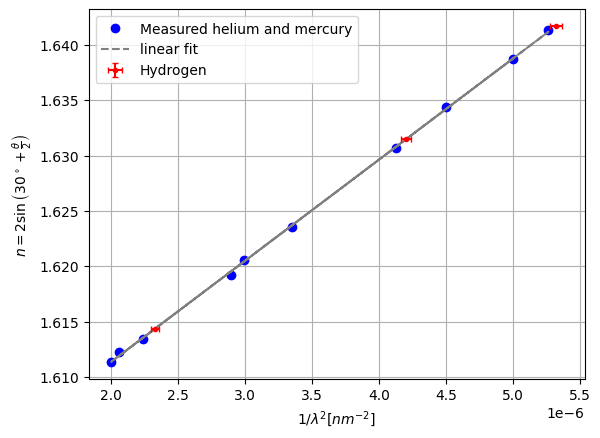

In [15]:
data = '''
# wavelength theta
# helium
447.15 50.04
471.31 49.61
492.19 49.24
587.56 48.11
667.82 47.55
706.52 47.35
# mercury
435.83 50.30
546.07 48.54
578.0 48.25 # averaged
697 47.44
'''
lmd, theta = np.genfromtxt(data.splitlines()).T
theta *= np.pi/ 180
x = 1/lmd**2
n = 2 * np.sin(np.pi/6 + theta/2)
plt.plot(x, n, 'o', color='blue', label='Measured helium and mercury')
fit = linregress(x, n)
B, C = fit.intercept, fit.slope
B_err, C_err = fit.intercept_stderr, fit.stderr
uB = ufloat(B, B_err)
uC = ufloat(C, C_err)
print(f'B = {uB}, C = {uC} 1/nm2')
plt.plot(x, B + C * x, '--', color='gray', label=fr'linear fit')

hydrogen = '''
434.0 50.34
486.1 49.32
656.3 47.64
'''
_, theta = np.genfromtxt(hydrogen.splitlines()).T
theta *= np.pi/ 180
n = 2 * np.sin(np.pi/6 + theta/2)

x = (n - uB) / uC
xvalues = [x_.n for x_ in x]
xerrors = [x_.s for x_ in x]
plt.errorbar(xvalues, n, yerr=0, xerr=xerrors, color='red', fmt='.', ls='',
             capsize=2, label='Hydrogen')

lambda_h = 1/ unumpy.sqrt(x)

for l in lambda_h:
    print(f'Hydrogen wavelength: {l}')


plt.ylabel(r'$n = 2 \sin\left(30^\circ + \frac{\theta}{2}\right)$')
plt.xlabel('1/$\\lambda^2 [{nm}^{-2}]$')
plt.legend()
plt.grid()
